#**Loan Default Prediction**

## 1. Problem Statement and Objectives

### Problem Statement

 Lenders and financial institutions must accurately assess the risk of loan default to make informed decisions. However, predicting the likelihood of loan default is a complex task that involves analyzing various applicant characteristics such as income, employment length, and credit history. Inaccurate risk assessments can lead to financial losses due to defaults or missed opportunities by rejecting creditworthy applicants. Therefore, the challenge is to develop a robust predictive model that can classify loan applicants as high or low default risk while providing meaningful insights from the data that the bank can leverage to improve their lending strategy.

### Objectives
- **Develop a Predictive Model for Loan Default Risk**
Build an end-to-end machine learning model that predicts the likelihood of an applicant defaulting on their loan based on features such as income, employment length, loan amount, and credit history.



- **Generate Data Insights**
Explore the dataset to uncover meaningful insights related to loan approval, default rates, and the key factors influencing the default risk, which can aid the bank in refining its credit risk assessment process.



- **Evaluate Model Performance**
Assess the performance of the predictive model using relevant metrics such as accuracy, precision, recall, and F1-score, ensuring that the model balances sensitivity to default risk and overall prediction accuracy.


- **Provide Actionable Recommendations**
Based on the insights and predictive model results, provide the bank with actionable recommendations on how they can improve their loan approval and risk management processes, identifying any underrepresented trends that might influence decision-making.


By achieving these objectives, the bank will be better equipped to assess loan applicants' risk and make more informed, data-driven lending decisions.

## 2. Data Description

The "Loan Applicant Data for Credit Risk Analysis" dataset, provided by Blossom Academy for the Data Fair's data challenge, contains information about individuals applying for loans. This data is designed to support the development of predictive models for assessing credit risk and loan default likelihood. The dataset includes various features that describe each applicant's financial situation, loan details, and credit history.



The dataset contains the following columns:

Id: Unique Identifier for the applicant.

Age: Age of the loan applicant.

Income: Annual income of the loan applicant.

Home: Home ownership status (RENT, OWN, MORTGAGE).

Emp_length: Employment length in years.

Intent: The intent of the loan (PERSONAL, EDUCATION, MEDICAL, HoME IMPROVEMENT).

Amount: Loan amount requested.

Rate: Interest rate for the loan.

Status: Loan approval status (Fully Paid, Charged Off, Current).

Percent_income: The percentage of the applicant's income that the loan amount represents.

Default: Target variable indicating if the applicant defaulted (Y for Yes, N for No).

Cred_length: Length of the applicant's credit history.

## 3. Table of Contents

1. [Problem Statement and Objectives](#1.-Problem-Statement-and-Objectives)

2. [Data Description](#2.-Data-Description)

3. [Table of Contents](#3.-Table-of-Contents)

4. [Importation of Libraries and Packages](#4.-Importation-of-Libraries-and-Packages)

5. [Data Importation](5.-Data-Importation)

6. [Data Cleaning and Validation](#6.-Data-Cleaning-and-Validation)

7. [Exploratory Data Analysis](#7.-Exploratory-Data-Analysis)

8. [Data Preprocessing](#8.-Data-Preprocessing)

9. [Feature Engineering](#9.-Feature-Engineering)

10. [Model Building](#10.-Model-Building)

11. [Model Validation](#11.-Model-Validation)

12. [Model Comparison and Selection](#10.-Model-Comparison-and-Selection)

13. [Summary](#12.-Summary)

## 4. Importation of Libraries and Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Importing classifiers and other tools
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score, roc_curve)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              VotingClassifier, BaggingClassifier, AdaBoostClassifier)
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

# Suppress warnings
warnings.filterwarnings("ignore")





## 5. Data Importation

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Loan Default Prediction/credit_risk.csv")

In [ ]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [ ]:
df.tail()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32580,32780,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


##. 6. Data Cleaning and Validation

In [ ]:
df.shape

(32581, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Viewing the columns
df.columns

Index(['Id', 'Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length'],
      dtype='object')

In [ ]:
df.dtypes

,0
Id,int64
Age,int64
Income,int64
Home,object
Emp_length,float64
Intent,object
Amount,int64
Rate,float64
Status,int64
Percent_income,float64


The values in the "Home" and "Intent" columns will be converted to numerical values during data preprocessing.

In [ ]:
# Viewing unique values in each categorical column
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")

Home: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Default: ['Y' 'N']


In [ ]:
#Finding all values for where Age is nan
df['Age'].unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67])

In [ ]:
df.isnull().sum()

,0
Id,0
Age,0
Income,0
Home,0
Emp_length,895
Intent,0
Amount,0
Rate,3116
Status,0
Percent_income,0


The "Emp_length" and "Rate" columns have missing values. These will be filled::.

In [ ]:
# Categorizing the ages
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 150], labels=['18-25', '26-35', '36-45', '46-55', '55+'])
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,Age_Group
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3,18-25
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,18-25
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,18-25
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,18-25
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,18-25


In [ ]:
# Group by Age_Group and calculate mean Emp_length for each group
emp_length_means = df.groupby('Age_Group')['Emp_length'].mean()

# Fill missing Emp_length values based on the Age_Group
df['Emp_length'] = df.apply(lambda row: emp_length_means[row['Age_Group']] if pd.isnull(row['Emp_length']) else row['Emp_length'], axis=1)

In [ ]:
# Handling missing values in the 'Rate' columns by replaicng missing values with the medians of the column

df['Rate'].fillna(df['Rate'].median(), inplace=True)

# Verifying that there are no missing values left
df.isnull().sum()


,0
Id,0
Age,0
Income,0
Home,0
Emp_length,0
Intent,0
Amount,0
Rate,0
Status,0
Percent_income,0


There are no missing values in the columns.

In [ ]:
df["Status"].nunique()

2

The status column will be dropped because in the data description, there are 3 unique values in the column, but the data only shows 2. It may be a data entry error.

In [ ]:
df.drop("Status", axis=1, inplace=True)

## 7. Exploratory Data Analysis

### Univariate Analysis

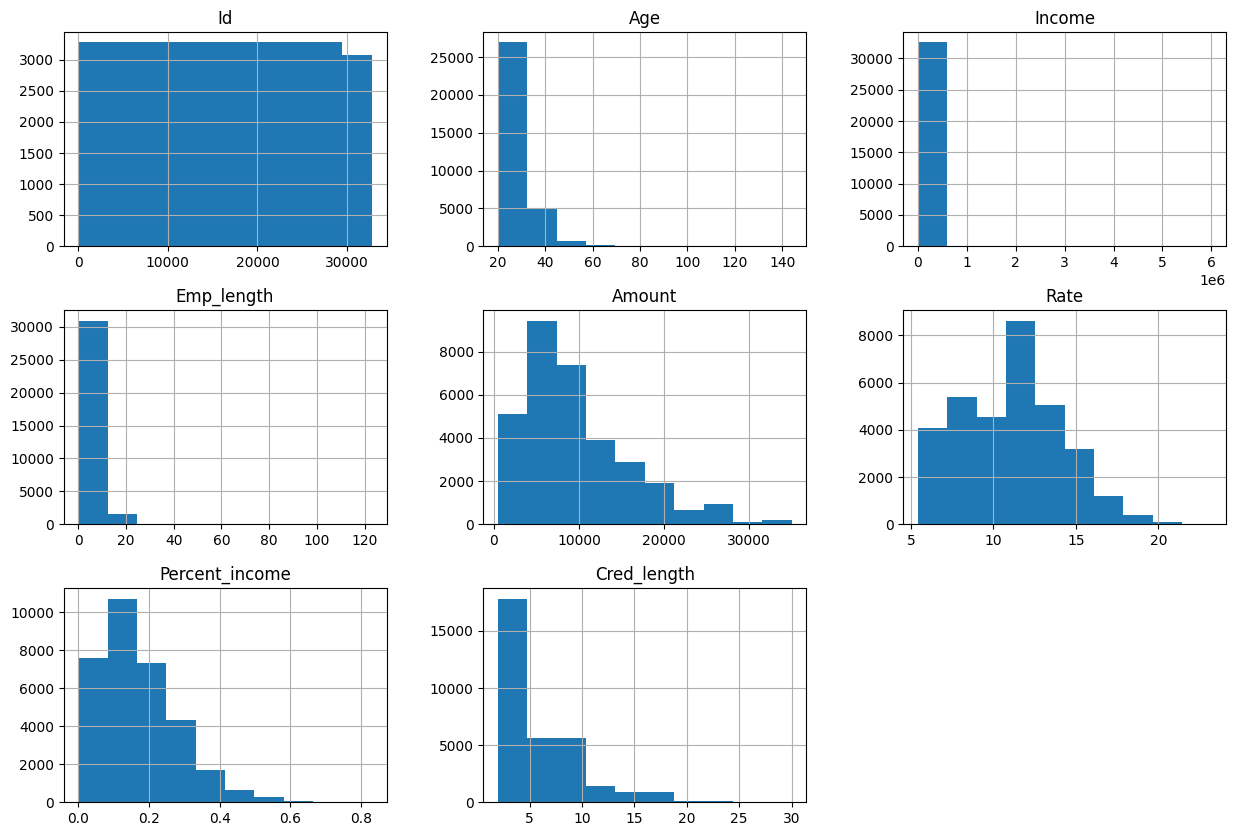

In [ ]:
df.hist(figsize=(15,10))
plt.show()

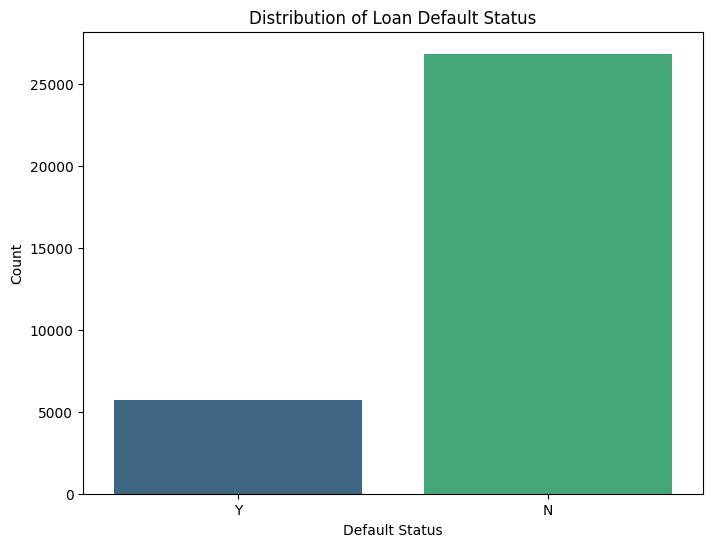

In [ ]:
# Distribution of Loan Default Status

plt.figure(figsize=(8, 6))
sns.countplot(x='Default', data=df, palette='viridis')
plt.title('Distribution of Loan Default Status')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

The dataset is highly imbalanced. This will be addressed later during data preprocessing using Synthetic Minority Oversampling Technique (SMOTE). SMOTE is a technique used to address imbalanced datasets.

<Axes: ylabel='Age'>

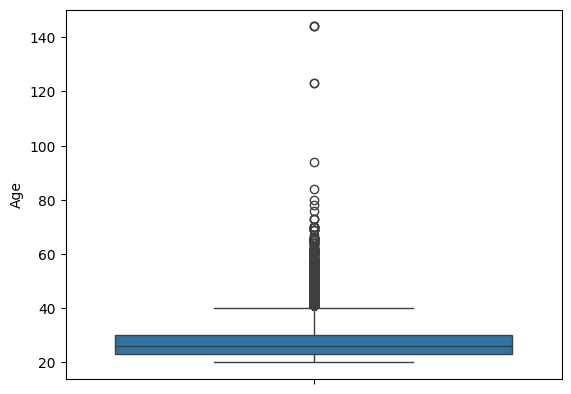

In [ ]:
#boxplot for age
sns.boxplot(df['Age'])

In [ ]:
df['Age'].max()

144

There is an outlier here. No loan applicant will be older than 100 years.

In [ ]:
# Viewing the rows with the age 144
df[df['Age'] == 144]

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Age_Group
81,81,144,250000,RENT,4.0,VENTURE,4800,13.57,0.02,N,3,55+
183,183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.86,0.03,N,2,55+
32297,32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0.00,N,25,55+


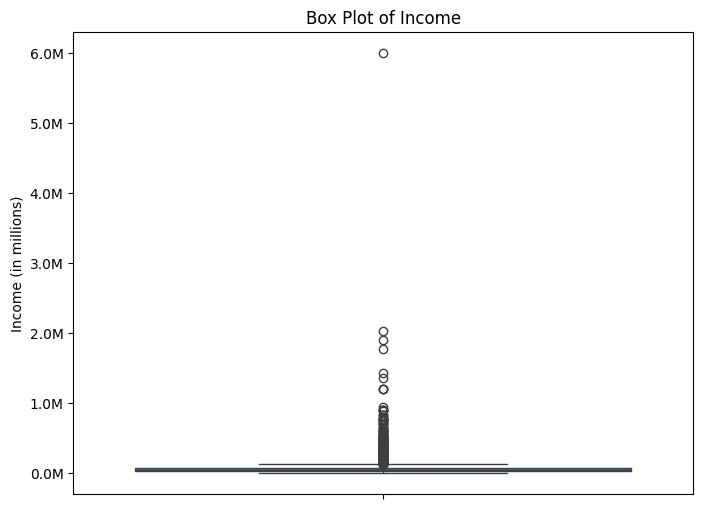

In [ ]:
from matplotlib.ticker import FuncFormatter

#boxplot for income
plt.figure(figsize=(8, 6))

# Create a boxplot with seaborn
sns.boxplot(data=df['Income'])

# Formatter function to avoid scientific notation
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

# Add title and labels
plt.title('Box Plot of Income')
plt.ylabel('Income (in millions)')

# Show the plot
plt.show()

In [ ]:
df['Income'].max()

6000000

There is an outlier in this column. No one with an income of 6,000,000 will be taking a loan.

In [ ]:
# Row with income 6000000
df[df['Income'] == 6000000]

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Age_Group
32297,32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0.0,N,25,55+


<Axes: ylabel='Emp_length'>

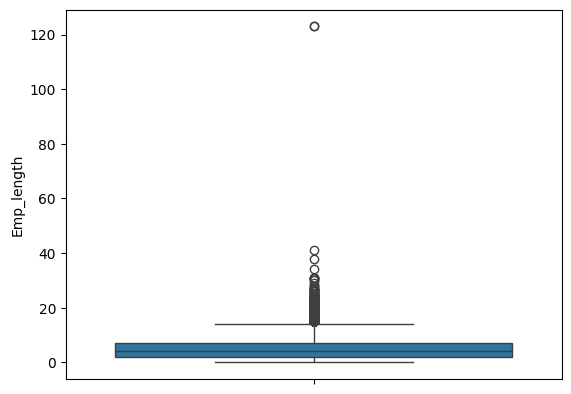

In [ ]:
#boxplot for Employment Length
sns.boxplot(df['Emp_length'])

In [ ]:
df['Emp_length'].max()

123.0

There is an employment length of 123 years but no one works that long.

In [ ]:
# Viewing the row with the Employment Length
df[df['Emp_length'] == 123]

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Age_Group
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,0.59,Y,3,18-25
210,210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0.10,N,4,18-25


<Axes: ylabel='Amount'>

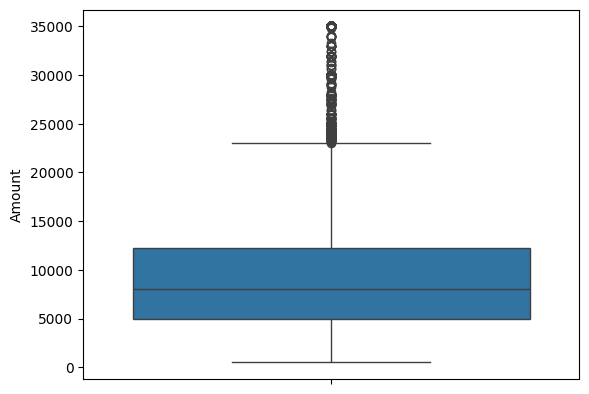

In [ ]:
#boxplot for Loan Amount
sns.boxplot(df['Amount'])

<Axes: ylabel='Rate'>

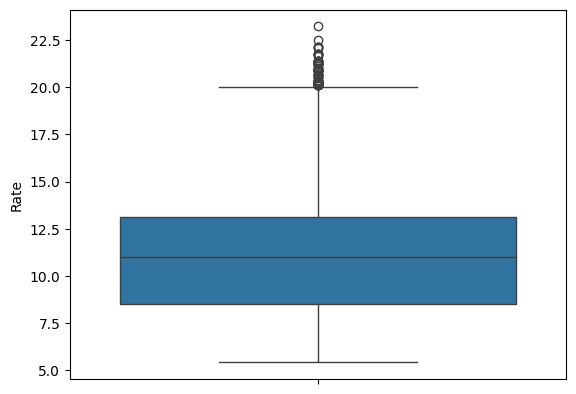

In [ ]:
#boxplot for rate
sns.boxplot(df['Rate'])

<Axes: ylabel='Percent_income'>

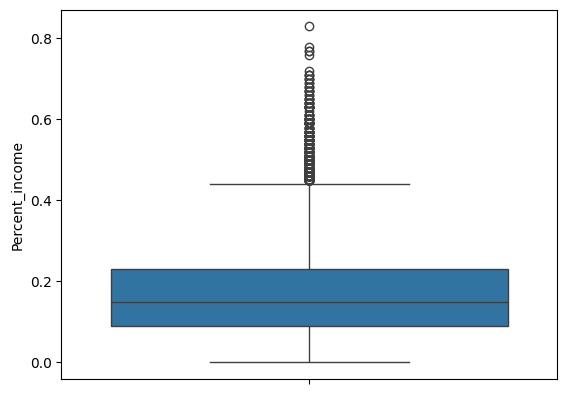

In [ ]:
#boxplot for percentage of income
sns.boxplot(df['Percent_income'])

<Axes: ylabel='Cred_length'>

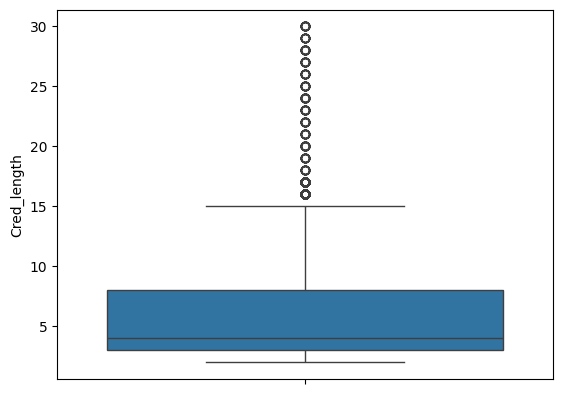

In [ ]:
#boxplot for credit length
sns.boxplot(df['Cred_length'])

Treating the outliers

In [ ]:
# Function to replace outliers with the median based on IQR
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate median of the column
    median_value = df[column].median()

    # Replace outliers with the median
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

    return df

# Apply the function to Age, Emp_Length, and Income columns
df = replace_outliers_with_median(df, 'Age')
df = replace_outliers_with_median(df, 'Emp_length')
df = replace_outliers_with_median(df, 'Income')



<Axes: ylabel='Age'>

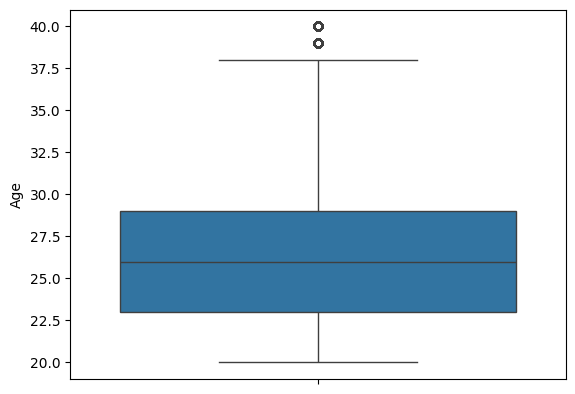

In [ ]:
#boxplot for Age
sns.boxplot(df['Age'])

<Axes: ylabel='Income'>

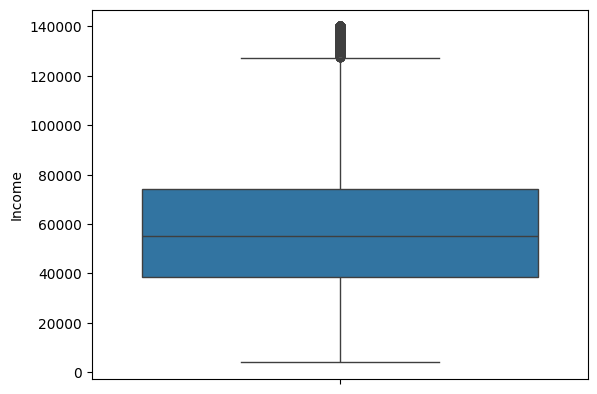

In [ ]:
#boxplot for Income
sns.boxplot(df['Income'])

<Axes: ylabel='Emp_length'>

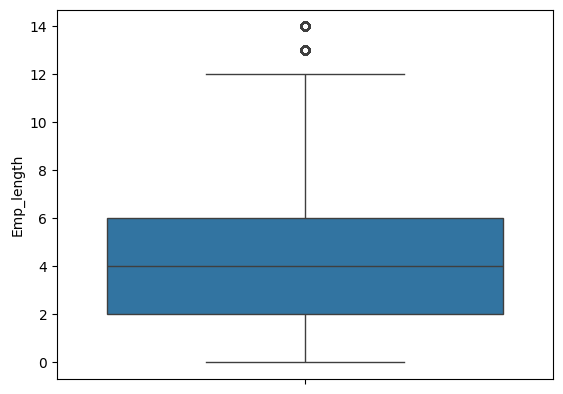

In [ ]:
#boxplot for Employment Length
sns.boxplot(df['Emp_length'])

In [ ]:
#dropping the Age Group column
df.drop('Age_Group', axis=1, inplace=True)

In [ ]:
# Categorizing the ages
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 150], labels=['18-25', '26-35', '36-45', '46-55', '55+'])
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Age_Group
0,0,22.0,59000.0,RENT,4.0,PERSONAL,35000,16.02,0.59,Y,3,18-25
1,1,21.0,9600.0,OWN,5.0,EDUCATION,1000,11.14,0.10,N,2,18-25
2,2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57,N,3,18-25
3,3,23.0,65500.0,RENT,4.0,MEDICAL,35000,15.23,0.53,N,2,18-25
4,4,24.0,54400.0,RENT,8.0,MEDICAL,35000,14.27,0.55,Y,4,18-25


### Bivariate Analysis

Text(0.5, 0, 'Age Group')

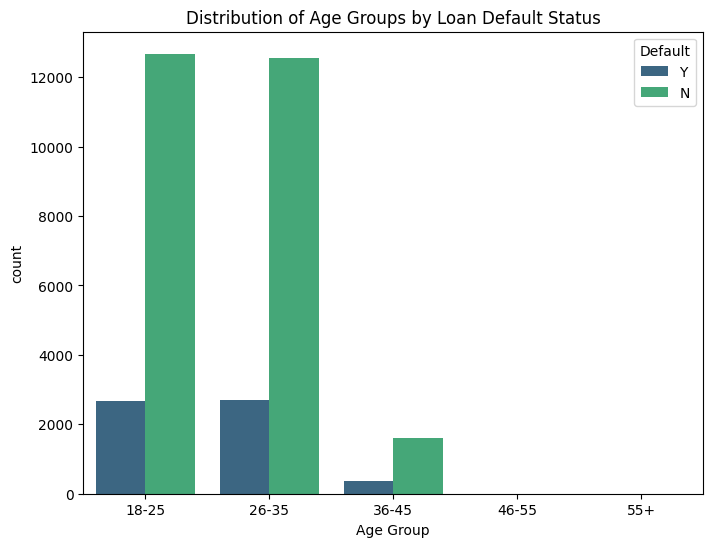

In [ ]:
# Distribution of Age Groups by defaulters
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', hue='Default', data=df, palette='viridis')
plt.title('Distribution of Age Groups by Loan Default Status')
plt.xlabel('Age Group')


In [ ]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Age_Group
0,0,22.0,59000.0,RENT,4.0,PERSONAL,35000,16.02,0.59,Y,3,18-25
1,1,21.0,9600.0,OWN,5.0,EDUCATION,1000,11.14,0.10,N,2,18-25
2,2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57,N,3,18-25
3,3,23.0,65500.0,RENT,4.0,MEDICAL,35000,15.23,0.53,N,2,18-25
4,4,24.0,54400.0,RENT,8.0,MEDICAL,35000,14.27,0.55,Y,4,18-25


In [ ]:
df.dtypes

,0
Id,int64
Age,float64
Income,float64
Home,object
Emp_length,float64
Intent,object
Amount,int64
Rate,float64
Percent_income,float64
Default,object


In [ ]:
cols = df.select_dtypes(['object']).columns.tolist()

In [ ]:
# Changing the data type of object type column to category.
for i in cols:
    df[i] = df[i].astype('category')

In [ ]:
df.dtypes

,0
Id,int64
Age,float64
Income,float64
Home,category
Emp_length,float64
Intent,category
Amount,int64
Rate,float64
Percent_income,float64
Default,category


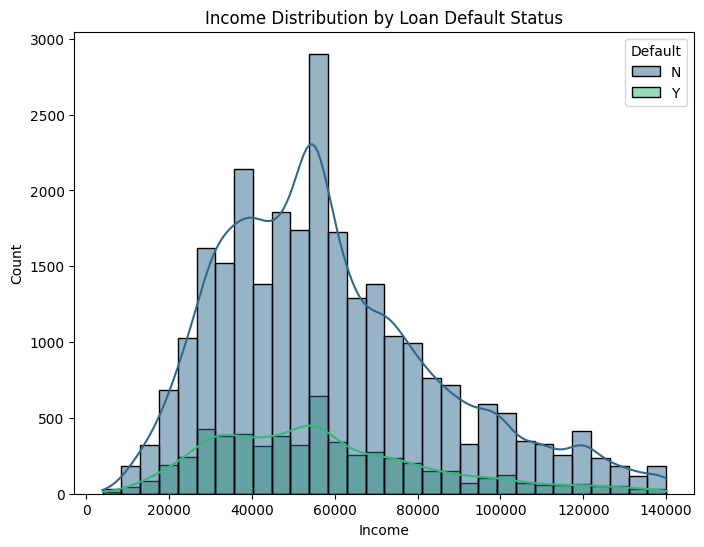

In [ ]:
# Income Distribution of Loan Default Status

plt.figure(figsize=(8, 6))
sns.histplot(df, x='Income', hue='Default', bins=30, kde=True, palette='viridis')
plt.title('Income Distribution by Loan Default Status')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

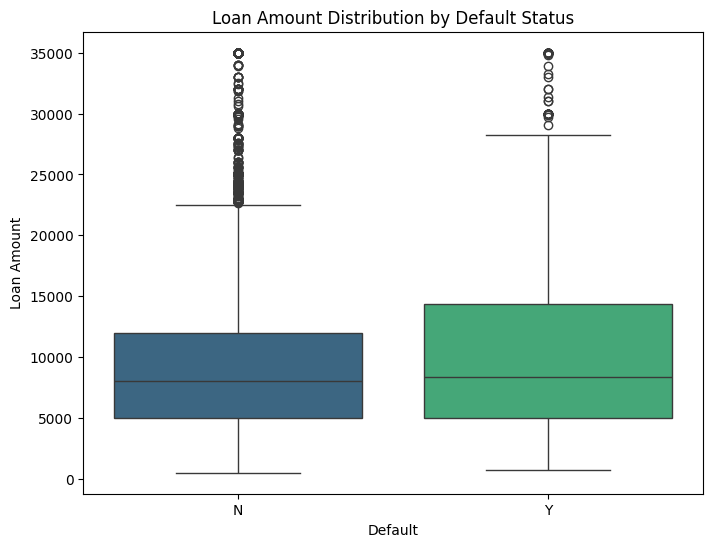

In [ ]:
# Loan Amount by Default Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Default', y='Amount', data=df, palette='viridis')
plt.title('Loan Amount Distribution by Default Status')
plt.xlabel('Default')
plt.ylabel('Loan Amount')
plt.show()


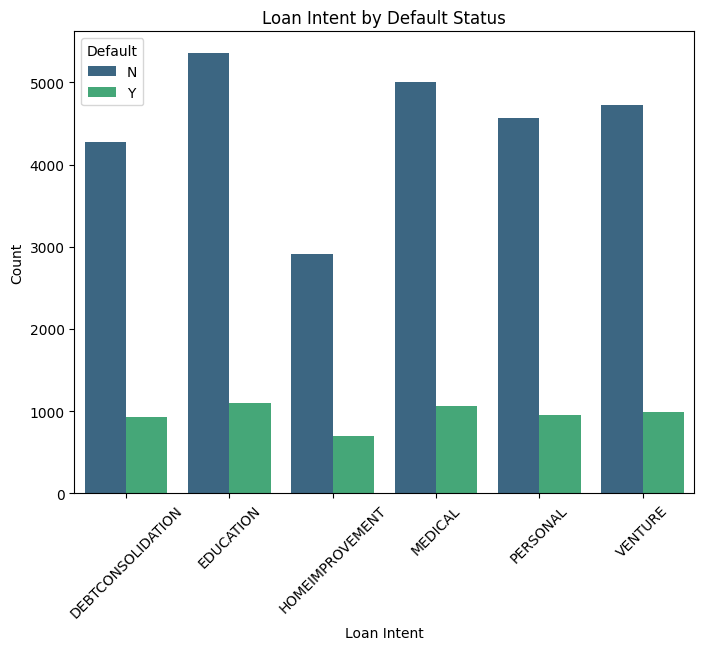

In [ ]:
# Loan Intent by Default Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Intent', hue='Default', data=df, palette='viridis')
plt.title('Loan Intent by Default Status')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

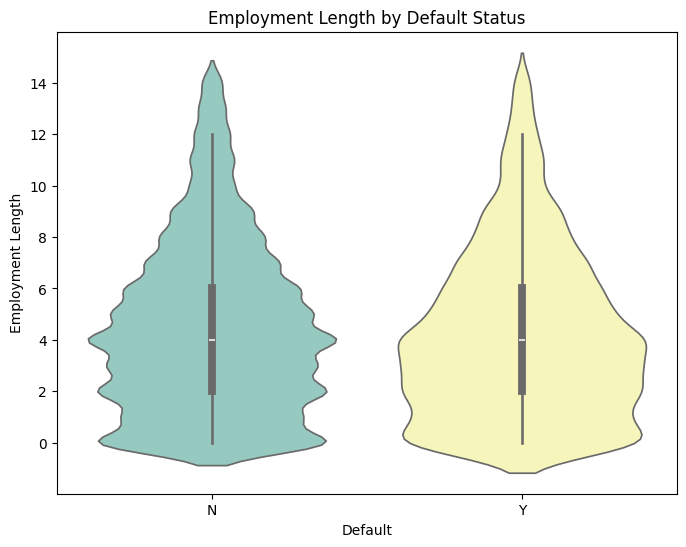

In [ ]:
# Employment Length by Default Status
plt.figure(figsize=(8, 6))
sns.violinplot(x='Default', y='Emp_length', data=df, palette='Set3')
plt.title('Employment Length by Default Status')
plt.xlabel('Default')
plt.ylabel('Employment Length')
plt.show()


### Multivariate Analysis

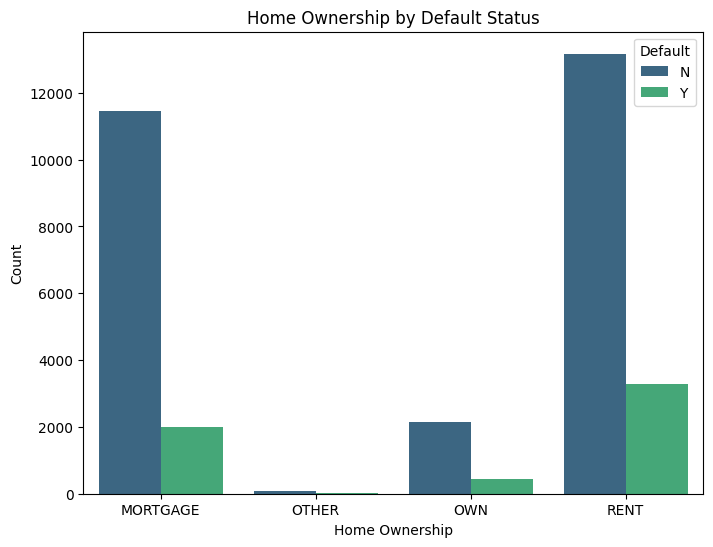

In [ ]:
# Home Ownership by Default Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Home', hue='Default', data=df, palette='viridis')
plt.title('Home Ownership by Default Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()


<Axes: >

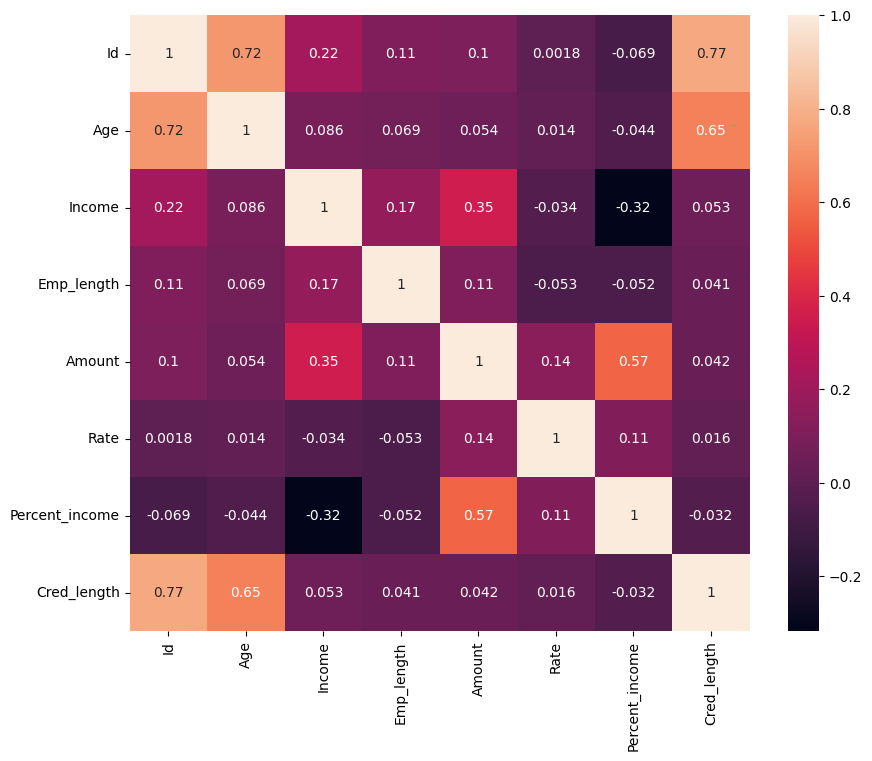

In [ ]:
# Correlation Heatmap of features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
# Dropping the age column
df.drop('Age', axis=1, inplace=True)

## 8. Data Preprocessing

In [ ]:
# Convert categorical variables 'Home' and 'Intent' using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_features = encoder.fit_transform(df[['Home', 'Intent']])

encoded_columns = encoder.get_feature_names_out(['Home', 'Intent'])

encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

df = pd.concat([df.drop(['Home', 'Intent'], axis=1), encoded_df], axis=1)

df.head()

,Id,Income,Emp_length,Amount,Rate,Percent_income,Default,Cred_length,Age_Group,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,59000.0,4.0,35000,16.02,0.59,Y,3,18-25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,9600.0,5.0,1000,11.14,0.10,N,2,18-25,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,9600.0,1.0,5500,12.87,0.57,N,3,18-25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,65500.0,4.0,35000,15.23,0.53,N,2,18-25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,54400.0,8.0,35000,14.27,0.55,Y,4,18-25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.columns

Index(['Id', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income',
       'Default', 'Cred_length', 'Age_Group', 'Home_OTHER', 'Home_OWN',
       'Home_RENT', 'Intent_EDUCATION', 'Intent_HOMEIMPROVEMENT',
       'Intent_MEDICAL', 'Intent_PERSONAL', 'Intent_VENTURE'],
      dtype='object')

For every value in each column, a new column is created for it with 1 indicating the presence of that value or 0 indicating the absence

In [ ]:
# Convert 'Default' (target variable) from 'Y'/'N' to 1 and 0
df['Default'] = df['Default'].map({'Y': 1, 'N': 0})
df.head()


,Id,Income,Emp_length,Amount,Rate,Percent_income,Default,Cred_length,Age_Group,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,59000.0,4.0,35000,16.02,0.59,1,3,18-25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,9600.0,5.0,1000,11.14,0.10,0,2,18-25,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,9600.0,1.0,5500,12.87,0.57,0,3,18-25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,65500.0,4.0,35000,15.23,0.53,0,2,18-25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,54400.0,8.0,35000,14.27,0.55,1,4,18-25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Label encoding for the Age-Group Column
label_encoder = LabelEncoder()
df['Age_Group'] = label_encoder.fit_transform(df['Age_Group'])
df.head()

,Id,Income,Emp_length,Amount,Rate,Percent_income,Default,Cred_length,Age_Group,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,59000.0,4.0,35000,16.02,0.59,1,3,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,9600.0,5.0,1000,11.14,0.10,0,2,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,9600.0,1.0,5500,12.87,0.57,0,3,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,65500.0,4.0,35000,15.23,0.53,0,2,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,54400.0,8.0,35000,14.27,0.55,1,4,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.tail()

,Id,Income,Emp_length,Amount,Rate,Percent_income,Default,Cred_length,Age_Group,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
32576,32576,53000.0,1.0,5800,13.16,0.11,0,30,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32577,32577,120000.0,4.0,17625,7.49,0.15,0,19,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32578,32578,76000.0,3.0,35000,10.99,0.46,0,28,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32579,32579,55000.0,5.0,15000,11.48,0.10,0,26,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32580,32780,42000.0,2.0,6475,9.99,0.15,0,30,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.dtypes

,0
Id,int64
Income,float64
Emp_length,float64
Amount,int64
Rate,float64
Percent_income,float64
Default,category
Cred_length,int64
Age_Group,int64
Home_OTHER,float64


## 9. Feature Engineering

<Axes: >

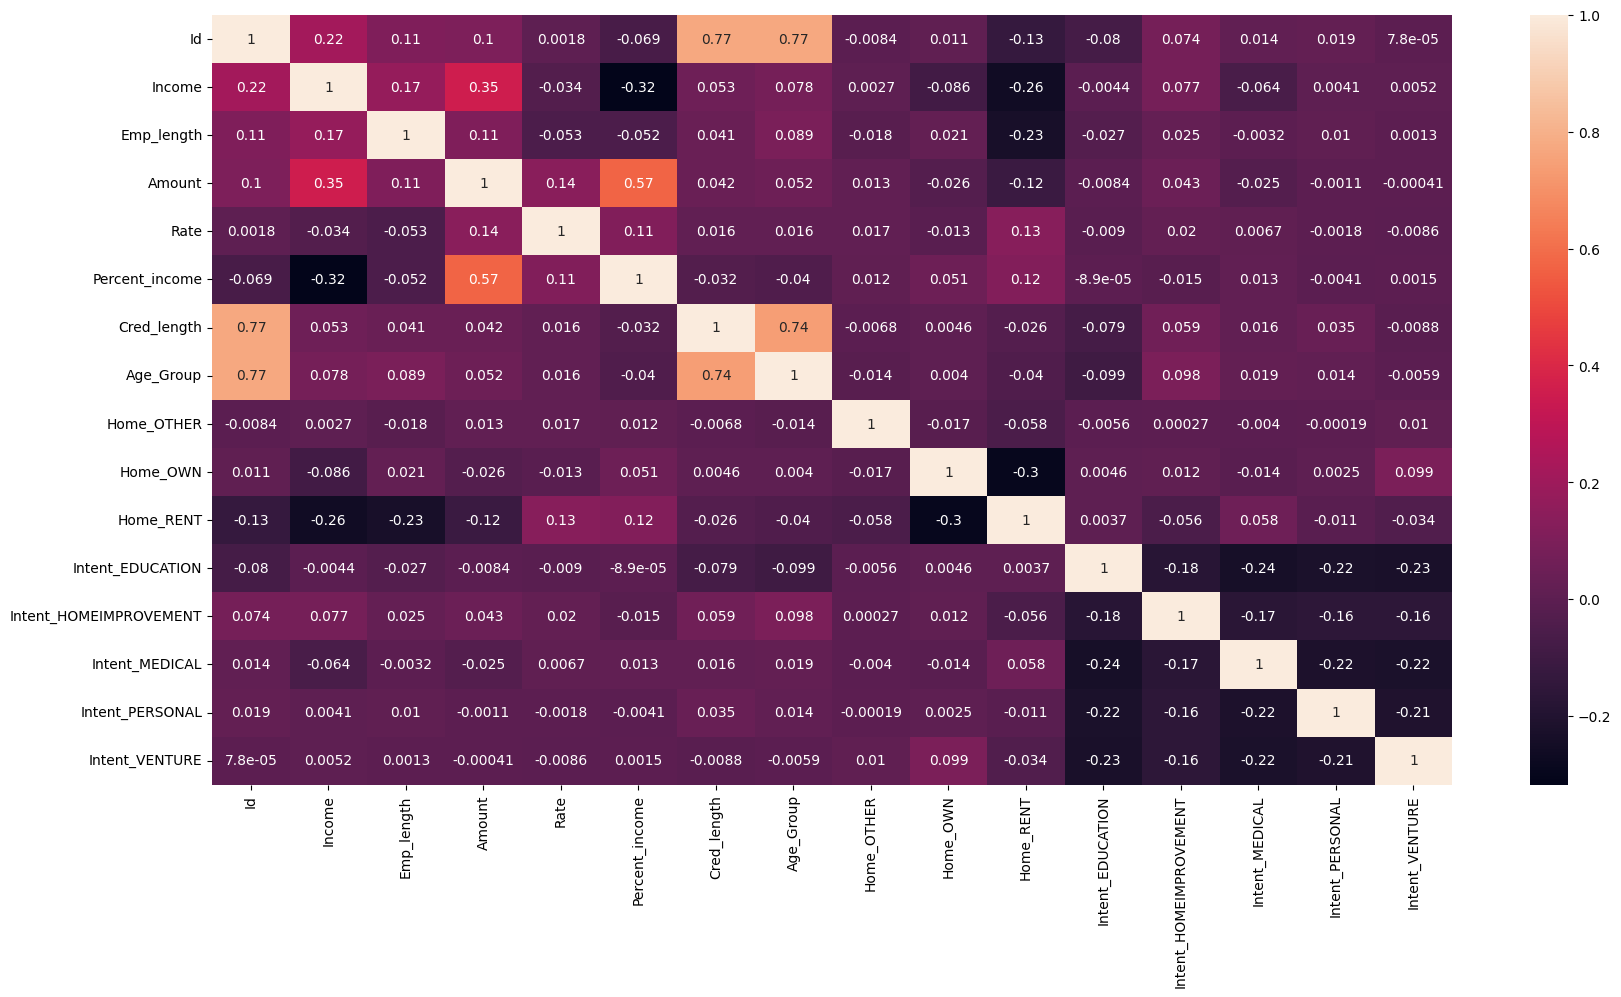

In [ ]:
# Correlation Heatmap of features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
# Define features (X) and target (y)
X = df.drop(['Id', 'Default'], axis=1)
y = df['Default']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The data was not normalized because I will be using tree-based models. There models do not require feature scaling. These models are based on splitting features and are not affected by feature magnitudes

## 10. Model Building

### Applying Synthetic Minority Oversampling Technique (SMOTE) to balance dataset

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Class distribution after SMOTE:", y_train.value_counts())

Class distribution after SMOTE: Default
0    21514
1    21514
Name: count, dtype: int64


In [ ]:
# Convert the resampled data back to a DataFrame
train_df = pd.DataFrame(X_train, columns=X_train.columns)

# Adding the target (y_train) back to the DataFrame for easier visualization
train_df['Default'] = y_train.values

# Display the first few rows of the resampled DataFrame
train_df.head()

,Income,Emp_length,Amount,Rate,Percent_income,Cred_length,Age_Group,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE,Default
0,46000.0,2.0,4800,11.09,0.10,24,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,26000.0,0.0,8500,16.45,0.33,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,51000.0,3.0,16000,13.11,0.31,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,56004.0,6.0,6000,7.88,0.11,4,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,79000.0,3.0,7000,12.54,0.09,3,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


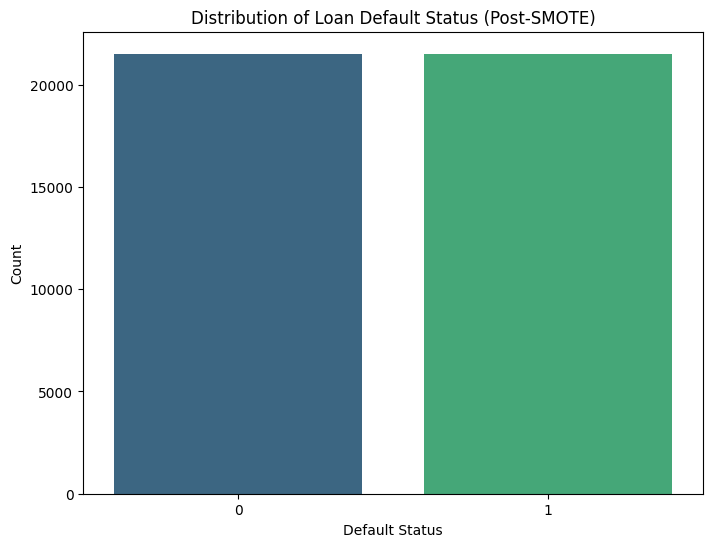

In [ ]:
# Distribution of Loan Default Status

plt.figure(figsize=(8, 6))
sns.countplot(x='Default', data=train_df, palette='viridis')
plt.title('Distribution of Loan Default Status (Post-SMOTE)')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

From the graph, it can be seen that the dataset is now balanced after using SMOTE

## Building models without Hyperparameter Tuning

In [ ]:
# Splitting the data
y_train = train_df['Default']
X_train = train_df.drop('Default', axis=1)

In [ ]:
X_train.head()

,Income,Emp_length,Amount,Rate,Percent_income,Cred_length,Age_Group,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,46000.0,2.0,4800,11.09,0.10,24,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,26000.0,0.0,8500,16.45,0.33,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51000.0,3.0,16000,13.11,0.31,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56004.0,6.0,6000,7.88,0.11,4,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,79000.0,3.0,7000,12.54,0.09,3,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, f1, recall, precision, roc_auc

# Define a function to print the evaluation metrics
def print_evaluation(model_name, metrics):
    accuracy, f1, recall, precision, roc_auc = metrics
    print(f'{model_name} Evaluation:')
    print(f'Accuracy: {accuracy:.3f}')
    print(f'F1 Score: {f1:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'ROC-AUC: {roc_auc:.3f}')

results = []

Decision Tree

Decision Tree Classifier Evaluation:
Accuracy: 0.805
F1 Score: 0.481
Recall: 0.494
Precision: 0.469
ROC-AUC: 0.684
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5322
           1       0.47      0.49      0.48      1195

    accuracy                           0.80      6517
   macro avg       0.68      0.68      0.68      6517
weighted avg       0.81      0.80      0.81      6517



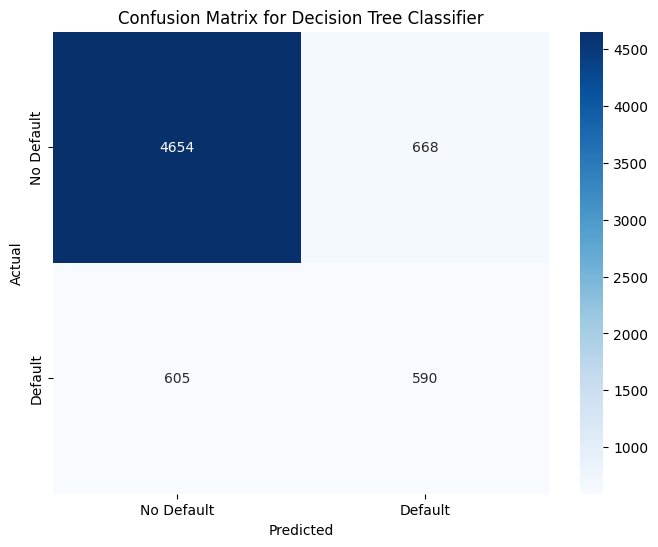

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree.predict(X_test)

# Evaluate the model
dt_metrics = evaluate_model(tree, X_test, y_test)
print_evaluation('Decision Tree Classifier', dt_metrics)
results.append(('Decision Tree Classifier', *dt_metrics))

# Print a detailed classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest

Random Forest Classifier Evaluation:
Accuracy: 0.822
F1 Score: 0.497
Recall: 0.479
Precision: 0.516
ROC-AUC: 0.689
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5322
           1       0.52      0.48      0.50      1195

    accuracy                           0.82      6517
   macro avg       0.70      0.69      0.69      6517
weighted avg       0.82      0.82      0.82      6517



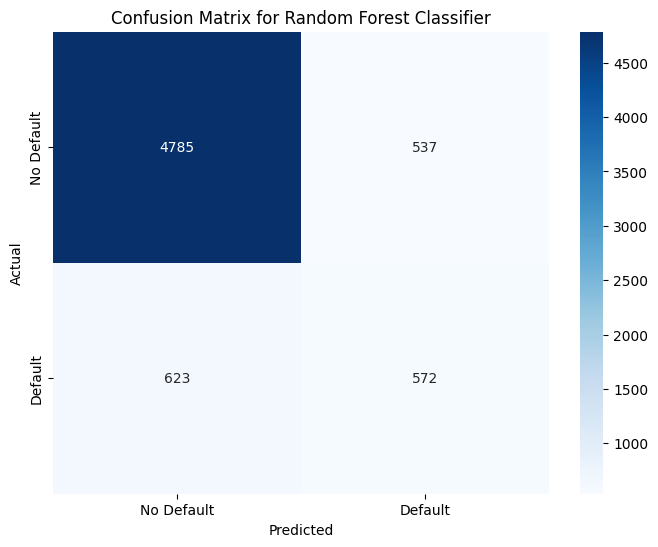

In [ ]:
rf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model using the evaluate_model function
rf_metrics = evaluate_model(rf, X_test, y_test)
print_evaluation('Random Forest Classifier', rf_metrics)
results.append(('Random Forest Classifier', *rf_metrics))

# Print a detailed classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XGBoost

XGBoost Classifier Evaluation:
Accuracy: 0.827
F1 Score: 0.522
Recall: 0.515
Precision: 0.530
ROC-AUC: 0.706


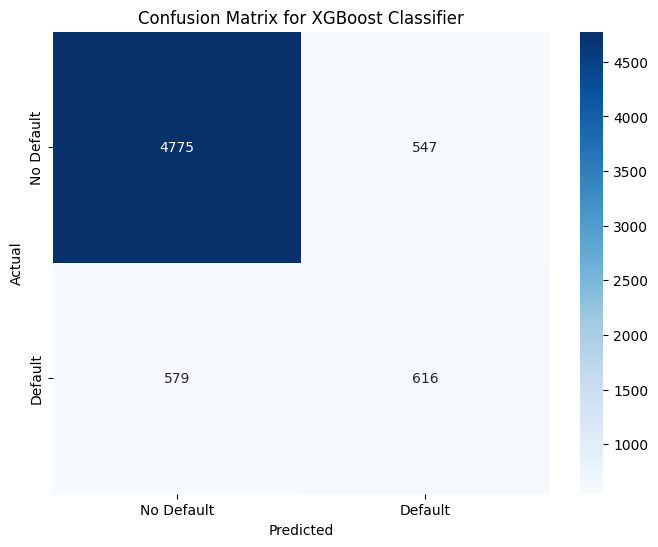

In [ ]:
# Initialize and train the XGBoost classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model using the evaluate_model function
xgb_metrics = evaluate_model(xgb, X_test, y_test)
print_evaluation('XGBoost Classifier', xgb_metrics)
results.append(('XGBoost Classifier', *xgb_metrics))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Model Selection

                      Model  Accuracy  F1 Score    Recall  Precision   ROC-AUC
0  Decision Tree Classifier  0.804665  0.481044  0.493724   0.468998  0.684104
1  Random Forest Classifier  0.822004  0.496528  0.478661   0.515780  0.688880
2        XGBoost Classifier  0.827221  0.522477  0.515481   0.529665  0.706350


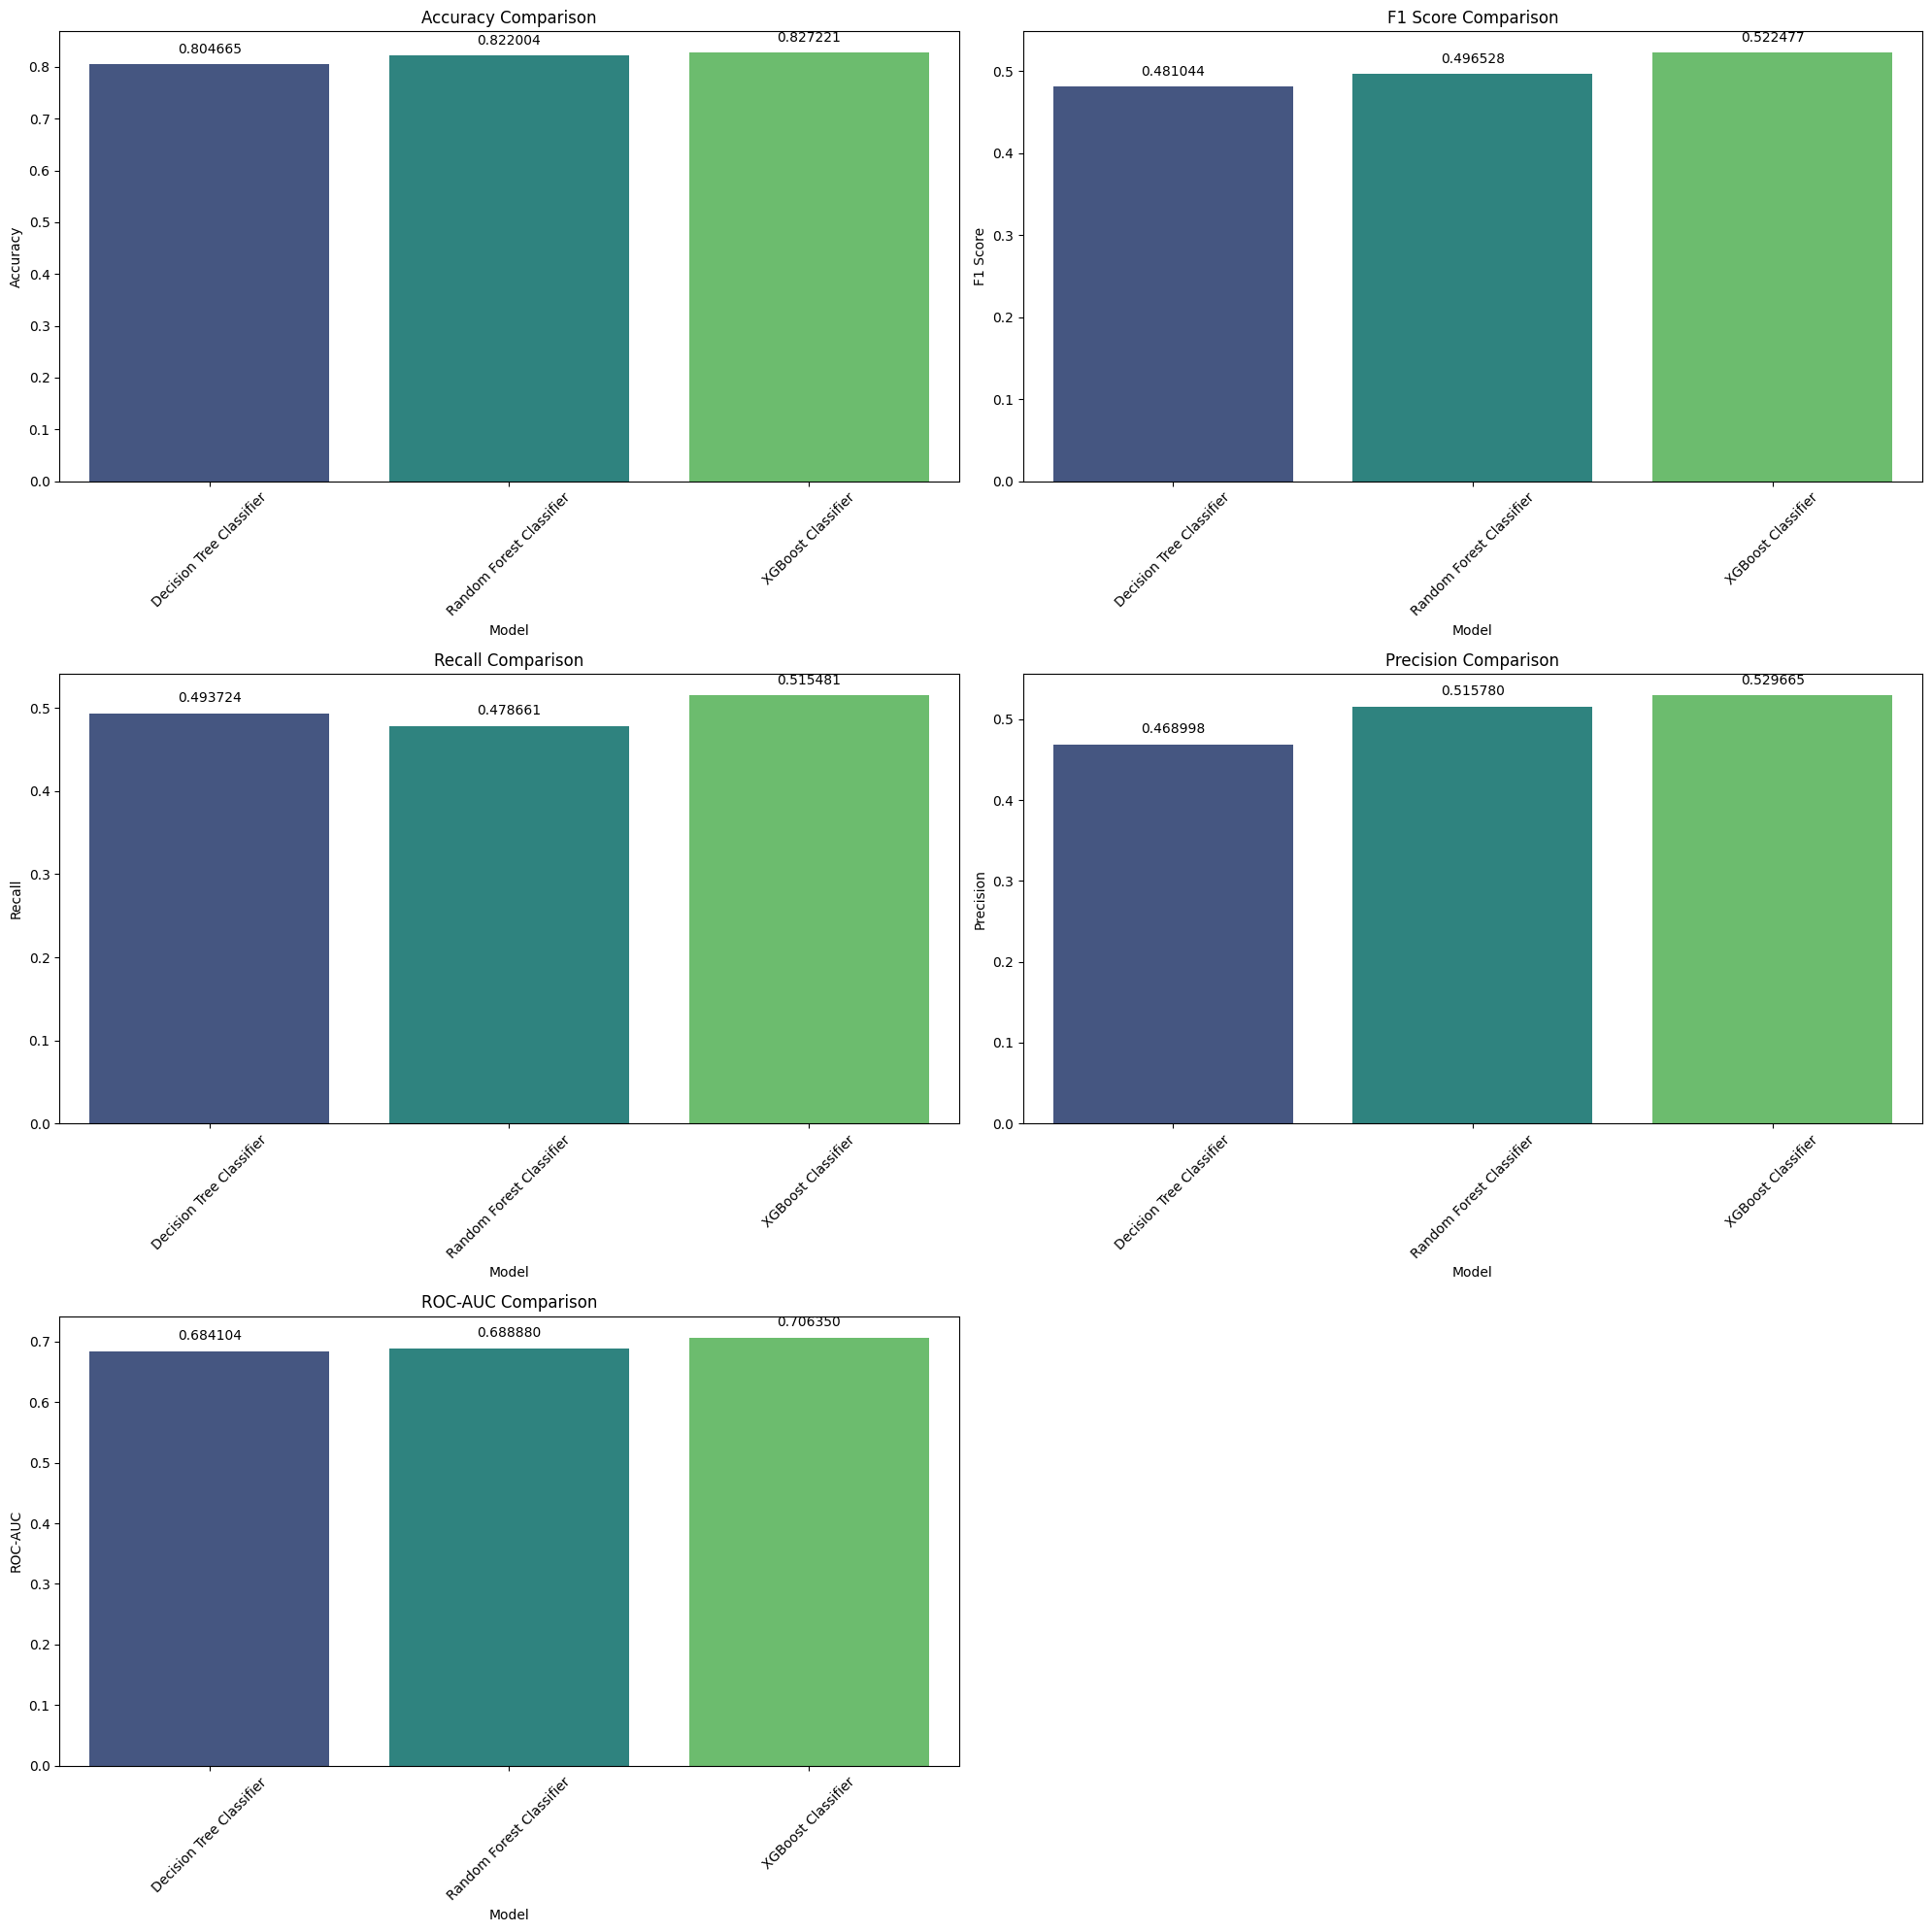

In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score', 'Recall', 'Precision', 'ROC-AUC'])
print(results_df)

# Set up the subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes = axes.ravel()

# List of metrics to plot
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision', 'ROC-AUC']

# Plot each metric in a barplot
for idx, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, hue='Model', data=results_df, ax=axes[idx], palette='viridis', dodge=False, legend=False)
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_ylabel(metric)
    axes[idx].set_xlabel('Model')
    for item in axes[idx].get_xticklabels():
        item.set_rotation(45)

    # Annotate bars with their values
    bars = axes[idx].patches
    for bar in bars:
        yval = bar.get_height()
        axes[idx].annotate(f'{yval:.6f}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                           xytext=(0, 6),
                           textcoords="offset points",
                           ha='center', va='bottom')

# Remove any unused subplots (in this case, axes[5])
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()



### Hyperparameter Tuning of XGBoost

In [ ]:
# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter space for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Perform RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to try
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all processors
)

# Fit RandomizedSearchCV on the resampled training data with top 10 features
xgb_random.fit(X_train, y_train)

# Get the best hyperparameters from RandomizedSearchCV
best_params_random = xgb_random.best_params_
print(f"Best Parameters from RandomizedSearchCV: {best_params_random}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters from RandomizedSearchCV: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.8}


Fine-Tuning XGBoost Model with GridSearchCV

In [ ]:
# Initialize the XGBoost model again with the best parameters from RandomizedSearchCV
xgb_tuned = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    **best_params_random  # Using the best parameters found in RandomizedSearchCV
)

# Define a smaller parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [best_params_random['n_estimators'] - 50, best_params_random['n_estimators'], best_params_random['n_estimators'] + 50],
    'learning_rate': [best_params_random['learning_rate'] - 0.01, best_params_random['learning_rate'], best_params_random['learning_rate'] + 0.01],
    'max_depth': [best_params_random['max_depth'] - 1, best_params_random['max_depth'], best_params_random['max_depth'] + 1],
    'min_child_weight': [best_params_random['min_child_weight'] - 1, best_params_random['min_child_weight'], best_params_random['min_child_weight'] + 1]
}

# Perform GridSearchCV for further hyperparameter tuning
xgb_grid = GridSearchCV(
    estimator=xgb_tuned,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV on the training set
xgb_grid.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params_grid = xgb_grid.best_params_
print(f"Best Parameters from GridSearchCV: {best_params_grid}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters from GridSearchCV: {'learning_rate': 0.21000000000000002, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 550}


Using the best parameters for the XGBoost Model

XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5322
           1       0.53      0.47      0.50      1195

    accuracy                           0.83      6517
   macro avg       0.71      0.69      0.70      6517
weighted avg       0.82      0.83      0.82      6517

XGBoost Model AUC-ROC: 0.882
XGBoost Model Train Accuracy: 0.989
XGBoost Model Test Accuracy: 0.825
XGBoost Model Train F1 Score: 0.989
XGBoost Model Test F1 Score: 0.498


<Axes: >

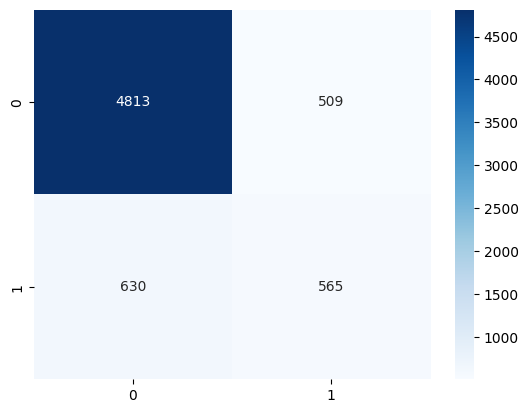

In [173]:
# Train the final XGBoost model with the best parameters from GridSearchCV
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    **best_params_grid  # Using the best parameters found in GridSearchCV
)
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]


# Classification report
print("XGBoost Model Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC score
auc_roc_final = roc_auc_score(y_test, y_prob)
print(f'XGBoost Model AUC-ROC: {auc_roc_final:.3f}')

# Train and Test Accuracy
print(f'XGBoost Model Train Accuracy: {xgb.score(X_train, y_train):.3f}')
print(f'XGBoost Model Test Accuracy: {xgb.score(X_test, y_test):.3f}')

# Train and Test F1 Score
print(f'XGBoost Model Train F1 Score: {f1_score(y_train, xgb.predict(X_train)):.3f}')
print(f'XGBoost Model Test F1 Score: {f1_score(y_test, y_pred):.3f}')

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [174]:
# Saving the model
import pickle
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

## Ensemble Models

Gradient Boosting Classifier

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      5322
           1       0.52      0.78      0.62      1195

    accuracy                           0.83      6517
   macro avg       0.73      0.81      0.76      6517
weighted avg       0.87      0.83      0.84      6517

Gradient Boosting AUC-ROC: 0.879
Gradient Boosting Train Accuracy: 0.893
Gradient Boosting Test Accuracy: 0.829
Gradient Boosting Train F1 Score: 0.898
Gradient Boosting Test F1 Score: 0.625


<Axes: >

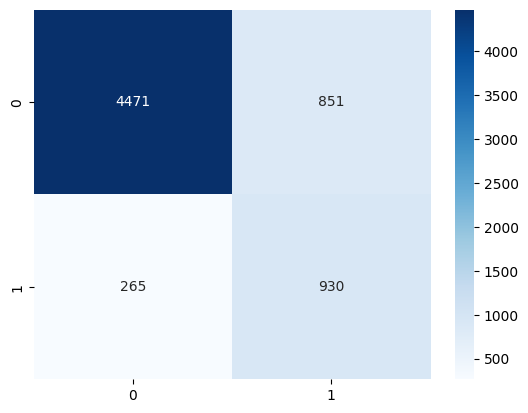

In [ ]:
# Initialize and train a Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Evaluation
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# AUC-ROC score
y_prob_gb = gb.predict_proba(X_test)[:, 1]
print(f'Gradient Boosting AUC-ROC: {roc_auc_score(y_test, y_prob_gb):.3f}')

# Train and Test Accuracy
print(f'Gradient Boosting Train Accuracy: {gb.score(X_train, y_train):.3f}')
print(f'Gradient Boosting Test Accuracy: {gb.score(X_test, y_test):.3f}')

# Train and Test F1 Score
print(f'Gradient Boosting Train F1 Score: {f1_score(y_train, gb.predict(X_train)):.3f}')
print(f'Gradient Boosting Test F1 Score: {f1_score(y_test, y_pred_gb):.3f}')

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


Hyperparameter Tuning Using RandomizedSearch CV on Gradient Boosting Classifier

In [ ]:
# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter space for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
}

# Perform RandomizedSearchCV
gb_random = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to try
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all processors
)

# Fit RandomizedSearchCV on the resampled training data
gb_random.fit(X_train, y_train)

# Get the best hyperparameters from RandomizedSearchCV
best_params_random = gb_random.best_params_
print(f"Best Parameters from RandomizedSearchCV: {best_params_random}")

# Use the best estimator to predict on the test set
best_gb = gb_random.best_estimator_
y_pred_gb = best_gb.predict(X_test)

# Evaluation
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# AUC-ROC score
y_prob_gb = best_gb.predict_proba(X_test)[:, 1]
print(f'Gradient Boosting AUC-ROC: {roc_auc_score(y_test, y_prob_gb):.3f}')

# Train and Test Accuracy
print(f'Gradient Boosting Train Accuracy: {best_gb.score(X_train, y_train):.3f}')
print(f'Gradient Boosting Test Accuracy: {best_gb.score(X_test, y_test):.3f}')

# Train and Test F1 Score
print(f'Gradient Boosting Train F1 Score: {f1_score(y_train, best_gb.predict(X_train)):.3f}')
print(f'Gradient Boosting Test F1 Score: {f1_score(y_test, y_pred_gb):.3f}')

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Gradient Boosting with GridSearchCV


In [ ]:
# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter space for GridSearchCV based on the best results from RandomizedSearchCV
param_grid = {
    'n_estimators': [gb_random.best_params_['n_estimators'] - 100, gb_random.best_params_['n_estimators'], gb_random.best_params_['n_estimators'] + 100],
    'learning_rate': [gb_random.best_params_['learning_rate'] - 0.01, gb_random.best_params_['learning_rate'], gb_random.best_params_['learning_rate'] + 0.01],
    'max_depth': [gb_random.best_params_['max_depth'] - 1, gb_random.best_params_['max_depth'], gb_random.best_params_['max_depth'] + 1],
    'min_samples_split': [gb_random.best_params_['min_samples_split'] - 1, gb_random.best_params_['min_samples_split'], gb_random.best_params_['min_samples_split'] + 1],
    'min_samples_leaf': [gb_random.best_params_['min_samples_leaf'] - 1, gb_random.best_params_['min_samples_leaf'], gb_random.best_params_['min_samples_leaf'] + 1],
    'subsample': [gb_random.best_params_['subsample'] - 0.1, gb_random.best_params_['subsample'], gb_random.best_params_['subsample'] + 0.1],
}

# Perform GridSearchCV for fine-tuning
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters from GridSearchCV
best_params_grid = grid_search.best_params_
print(f"Best Parameters from GridSearchCV: {best_params_grid}")

# Use the best estimator to predict on the test set
best_gb_final = grid_search.best_estimator_
y_pred_gb_final = best_gb_final.predict(X_test)

# Evaluation
print("Final Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb_final))

# AUC-ROC score
y_prob_gb_final = best_gb_final.predict_proba(X_test)[:, 1]
print(f'Final Gradient Boosting AUC-ROC: {roc_auc_score(y_test, y_prob_gb_final):.3f}')

# Train and Test Accuracy
print(f'Final Gradient Boosting Train Accuracy: {best_gb_final.score(X_train_resampled, y_train_resampled):.3f}')
print(f'Final Gradient Boosting Test Accuracy: {best_gb_final.score(X_test, y_test):.3f}')

# Train and Test F1 Score
print(f'Final Gradient Boosting Train F1 Score: {f1_score(y_train_resampled, best_gb_final.predict(X_train_resampled)):.3f}')
print(f'Final Gradient Boosting Test F1 Score: {f1_score(y_test, y_pred_gb_final):.3f}')

# Confusion Matrix Heatmap
cm_final = confusion_matrix(y_test, y_pred_gb_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Final Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Voting Classifier

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      5322
           1       0.53      0.69      0.60      1195

    accuracy                           0.83      6517
   macro avg       0.73      0.78      0.74      6517
weighted avg       0.85      0.83      0.84      6517

Voting Classifier AUC-ROC: 0.881
Voting Classifier Train Accuracy: 0.959
Voting Classifier Test Accuracy: 0.829
Voting Classifier Train F1 Score: 0.960
Voting Classifier Test F1 Score: 0.597


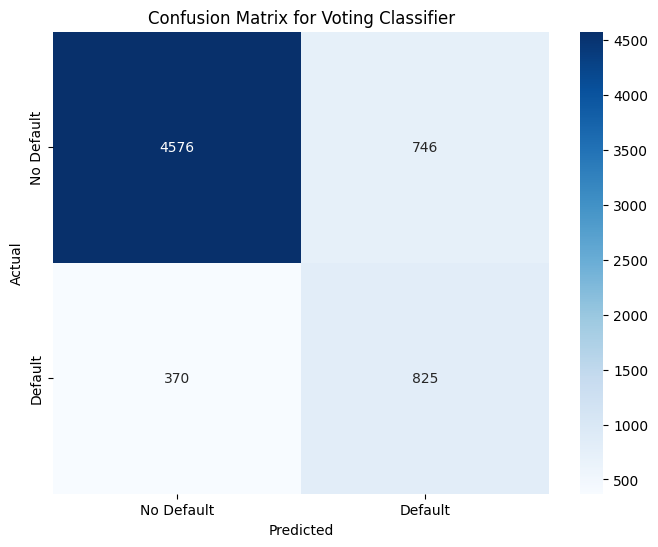

In [ ]:
# Initialize classifiers
gb = GradientBoostingClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create a voting classifier (soft voting)
voting_clf = VotingClassifier(estimators=[
    ('gb', gb),
    ('rf', rf),
    ('lr', lr),
    ('xgb', xgb)],
    voting='soft')  # probability-based voting

# Train the voting classifier on the resampled training data
voting_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)

# Evaluation
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))

# AUC-ROC score
y_prob_voting = voting_clf.predict_proba(X_test)[:, 1]
print(f'Voting Classifier AUC-ROC: {roc_auc_score(y_test, y_prob_voting):.3f}')

# Train and Test Accuracy
print(f'Voting Classifier Train Accuracy: {voting_clf.score(X_train_resampled, y_train_resampled):.3f}')
print(f'Voting Classifier Test Accuracy: {voting_clf.score(X_test, y_test):.3f}')

# Train and Test F1 Score
print(f'Voting Classifier Train F1 Score: {f1_score(y_train_resampled, voting_clf.predict(X_train_resampled)):.3f}')
print(f'Voting Classifier Test F1 Score: {f1_score(y_test, y_pred_voting):.3f}')

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Hyperparameter Tuning of Voting Classifier

In [ ]:
# Initialize classifiers
gb = GradientBoostingClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create a voting classifier (soft voting)
voting_clf = VotingClassifier(estimators=[
    ('gb', gb),
    ('rf', rf),
    ('lr', lr),
    ('xgb', xgb)],
    voting='soft')  # probability-based voting

# Define parameter distributions for each classifier
param_dist = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 4, 5, 6],
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'lr__C': [0.001, 0.01, 0.1, 1, 10],
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__max_depth': [3, 4, 5, 6],
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=voting_clf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to try
    cv=5,       # 5-fold cross-validation
    scoring='roc_auc',
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all processors
)

# Fit RandomizedSearchCV on the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters from RandomizedSearchCV
best_params_random = random_search.best_params_
print(f"Best Parameters from RandomizedSearchCV: {best_params_random}")

# Use the best estimator to predict on the test set
best_voting_clf = random_search.best_estimator_
y_pred_voting_final = best_voting_clf.predict(X_test)

# Evaluation
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting_final))

# AUC-ROC score
y_prob_voting_final = best_voting_clf.predict_proba(X_test)[:, 1]
print(f'Voting Classifier AUC-ROC: {roc_auc_score(y_test, y_prob_voting_final):.3f}')

# Train and Test Accuracy
print(f'Voting Classifier Train Accuracy: {best_voting_clf.score(X_train_resampled, y_train_resampled):.3f}')
print(f'Voting Classifier Test Accuracy: {best_voting_clf.score(X_test, y_test):.3f}')

# Train and Test F1 Score
print(f'Voting Classifier Train F1 Score: {f1_score(y_train_resampled, best_voting_clf.predict(X_train_resampled)):.3f}')
print(f'Voting Classifier Test F1 Score: {f1_score(y_test, y_pred_voting_final):.3f}')

# Confusion Matrix Heatmap
cm_final = confusion_matrix(y_test, y_pred_voting_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Fine Tuning Voting Classifier using GridSearchCV

In [ ]:
# Use best parameters from RandomizedSearchCV to define the grid for GridSearchCV
best_params_random = random_search.best_params_

# Define a new parameter grid based on the best parameters found in RandomizedSearchCV
param_grid = {
    'gb__n_estimators': [best_params_random['gb__n_estimators'] - 50, best_params_random['gb__n_estimators'], best_params_random['gb__n_estimators'] + 50],
    'gb__learning_rate': [best_params_random['gb__learning_rate'] - 0.01, best_params_random['gb__learning_rate'], best_params_random['gb__learning_rate'] + 0.01],
    'gb__max_depth': [best_params_random['gb__max_depth'] - 1, best_params_random['gb__max_depth'], best_params_random['gb__max_depth'] + 1],

    'rf__n_estimators': [best_params_random['rf__n_estimators'] - 50, best_params_random['rf__n_estimators'], best_params_random['rf__n_estimators'] + 50],
    'rf__max_depth': [best_params_random['rf__max_depth']] if best_params_random['rf__max_depth'] is not None else [None],  # Keeping the best depth if it was None
    'rf__min_samples_split': [best_params_random['rf__min_samples_split'], best_params_random['rf__min_samples_split'] + 2],

    'lr__C': [best_params_random['lr__C'] / 10, best_params_random['lr__C'], best_params_random['lr__C'] * 10],

    'xgb__n_estimators': [best_params_random['xgb__n_estimators'] - 50, best_params_random['xgb__n_estimators'], best_params_random['xgb__n_estimators'] + 50],
    'xgb__learning_rate': [best_params_random['xgb__learning_rate'] - 0.01, best_params_random['xgb__learning_rate'], best_params_random['xgb__learning_rate'] + 0.01],
    'xgb__max_depth': [best_params_random['xgb__max_depth'] - 1, best_params_random['xgb__max_depth'], best_params_random['xgb__max_depth'] + 1],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=voting_clf,
    param_grid=param_grid,
    cv=5,       # 5-fold cross-validation
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1   # Use all processors
)

# Fit GridSearchCV on the resampled training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params_grid = grid_search.best_params_
print(f"Best Parameters from GridSearchCV: {best_params_grid}")

# Use the best estimator to predict on the test set
best_voting_clf_grid = grid_search.best_estimator_
y_pred_voting_final_grid = best_voting_clf_grid.predict(X_test)

# Evaluation
print("Voting Classifier (GridSearchCV) Classification Report:")
print(classification_report(y_test, y_pred_voting_final_grid))

# AUC-ROC score
y_prob_voting_final_grid = best_voting_clf_grid.predict_proba(X_test)[:, 1]
print(f'Voting Classifier (GridSearchCV) AUC-ROC: {roc_auc_score(y_test, y_prob_voting_final_grid):.3f}')

# Train and Test Accuracy
print(f'Voting Classifier (GridSearchCV) Train Accuracy: {best_voting_clf_grid.score(X_train, y_train):.3f}')
print(f'Voting Classifier (GridSearchCV) Test Accuracy: {best_voting_clf_grid.score(X_test, y_test):.3f}')

# Train and Test F1 Score
print(f'Voting Classifier (GridSearchCV) Train F1 Score: {f1_score(y_train, best_voting_clf_grid.predict(X_train)):.3f}')
print(f'Voting Classifier (GridSearchCV) Test F1 Score: {f1_score(y_test, y_pred_voting_final_grid):.3f}')

# Confusion Matrix Heatmap
cm_grid = confusion_matrix(y_test, y_pred_voting_final_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_grid, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix for Voting Classifier (GridSearchCV)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Bagging Classifier

Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5322
           1       0.52      0.51      0.51      1195

    accuracy                           0.82      6517
   macro avg       0.70      0.70      0.70      6517
weighted avg       0.82      0.82      0.82      6517

Bagging Classifier AUC-ROC: 0.882
Bagging Classifier Train Accuracy: 1.000
Bagging Classifier Test Accuracy: 0.823
Bagging Classifier Train F1 Score: 1.000
Bagging Classifier Test F1 Score: 0.513


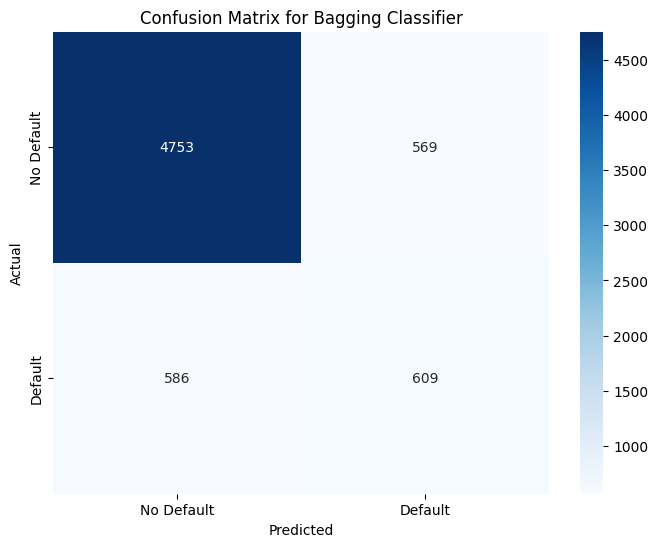

In [ ]:
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier
# Change 'base_estimator' to 'estimator'
bagging_clf = BaggingClassifier(estimator=base_estimator,
                                 n_estimators=100,  # Number of base estimators
                                 random_state=42)

# Train the Bagging Classifier on the resampled training data
bagging_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_bagging = bagging_clf.predict(X_test)

# Evaluation
print("Bagging Classifier Classification Report:")
print(classification_report(y_test, y_pred_bagging))

# AUC-ROC score
y_prob_bagging = bagging_clf.predict_proba(X_test)[:, 1]
print(f'Bagging Classifier AUC-ROC: {roc_auc_score(y_test, y_prob_bagging):.3f}')

# Train and Test Accuracy
print(f'Bagging Classifier Train Accuracy: {bagging_clf.score(X_train_resampled, y_train_resampled):.3f}')
print(f'Bagging Classifier Test Accuracy: {bagging_clf.score(X_test, y_test):.3f}')

# Train and Test F1 Score
print(f'Bagging Classifier Train F1 Score: {f1_score(y_train_resampled, bagging_clf.predict(X_train_resampled)):.3f}')
print(f'Bagging Classifier Test F1 Score: {f1_score(y_test, y_pred_bagging):.3f}')

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix for Bagging Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Hyperparameter Tuning of Bagging Classifier using RandomizedSearchCV

Fine Tuning of Bagging Classifier using GridSearchCV

**AdaBoost Classifer**

AdaBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5322
           1       0.53      0.75      0.62      1195

    accuracy                           0.83      6517
   macro avg       0.73      0.80      0.75      6517
weighted avg       0.86      0.83      0.84      6517

AdaBoost Classifier AUC-ROC: 0.882
AdaBoost Classifier Train Accuracy: 0.889
AdaBoost Classifier Test Accuracy: 0.830
AdaBoost Classifier Train F1 Score: 0.893
AdaBoost Classifier Test F1 Score: 0.617


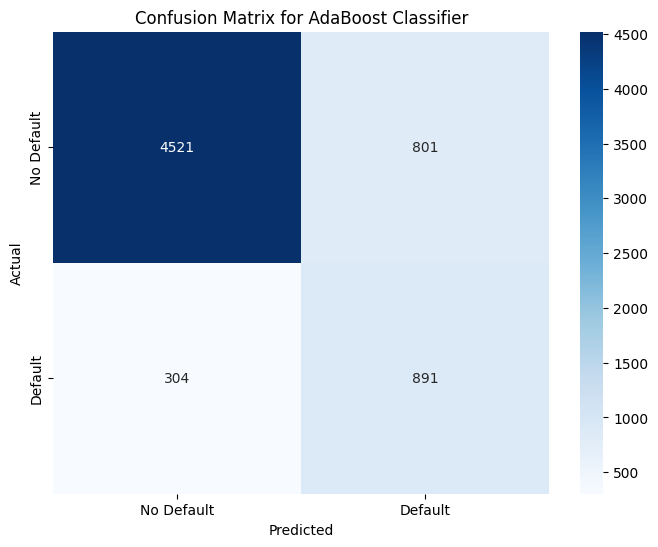

In [ ]:
# Initialize the base estimator (a Decision Tree with max_depth=1)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoost Classifier
# Change 'base_estimator' to 'estimator'
adaboost_clf = AdaBoostClassifier(estimator=base_estimator,
                                   n_estimators=100,  # Number of weak learners
                                   random_state=42)

# Train the AdaBoost Classifier on the resampled training data
adaboost_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_adaboost = adaboost_clf.predict(X_test)

# Evaluation
print("AdaBoost Classifier Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

# AUC-ROC score
# Use the entire X_test DataFrame for predict_proba
y_prob_adaboost = adaboost_clf.predict_proba(X_test)[:, 1]
print(f'AdaBoost Classifier AUC-ROC: {roc_auc_score(y_test, y_prob_adaboost):.3f}')

# Train and Test Accuracy
print(f'AdaBoost Classifier Train Accuracy: {adaboost_clf.score(X_train_resampled, y_train_resampled):.3f}')
print(f'AdaBoost Classifier Test Accuracy: {adaboost_clf.score(X_test, y_test):.3f}')

# Train and Test F1 Score
print(f'AdaBoost Classifier Train F1 Score: {f1_score(y_train_resampled, adaboost_clf.predict(X_train_resampled)):.3f}')
print(f'AdaBoost Classifier Test F1 Score: {f1_score(y_test, y_pred_adaboost):.3f}')

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Hyperparameter Tuning of Adaboost Classifier with RandomizedSearchCV

Fine Tuning of Adaboost Classifier using GridSearchCV

## 11. Model Validation

In [ ]:
# Using the models for predictions
y_pred_xgb = final_xgb.predict(X_test)
y_pred_voting = voting_clf.predict(X_test)
y_pred_bagging = bagging_clf.predict(X_test)
y_pred_adaboost = adaboost_clf.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Amount
- Cred_length
- Home_OTHER
- Income
- Percent_income


In [ ]:
validation_df = pd.DataFrame({
    'True Values': y_test,
    'XGBoost Predictions': y_pred_xgb,
    'Voting Classifier Predictions': y_pred_voting,
    'Bagging Classifier Predictions': y_pred_bagging,
    'AdaBoost Classifier Predictions': y_pred_adaboost
})

validation_df.head(20)

Model Evaluation Criterion

Model is attempting to find defaulters(1), which will be our True Positive(TP), and therefore non-defaulters(0) will be our True Negative(TN)

Model can make wrong predictions as:

Predicting a applicant will not default on a loan but, in reality, the applicant would default results in major loss in profits.
Predicting a applicant will default on a loan but, in reality, the applicant would have paid it off results in the bank loosing profit from the interest of that potential customer.
Which case is more important?

Banks are more fearfull of defaulters as that results in greater losses, and therefore must be more judicious when approving loans.
How to reduce the losses?

The bank would want recall to be maximized. The greater the recall score, higher the chances of minimizing False Negative.
In this case the false negative is predicting an applicant will not default(0), when the applicant would default(1)
That being said a high F1-Score is still preferable as that would result in more profits, as long as recall remains high.

## 12. Model Comaprison and Selection

## 13. Summary

Model Evaluation Criterion

Model is attempting to find defaulters(1), which will be our True Positive(TP), and therefore non-defaulters(0) will be our True Negative(TN)

Model can make wrong predictions as:

Predicting a applicant will not default on a loan but, in reality, the applicant would default results in major loss in profits.
Predicting a applicant will default on a loan but, in reality, the applicant would have paid it off results in the bank loosing profit from the interest of that potential customer.
Which case is more important?

Banks are more fearfull of defaulters as that results in greater losses, and therefore must be more judicious when approving loans.
How to reduce the losses?

The bank would want recall to be maximized. The greater the recall score, higher the chances of minimizing False Negative.
In this case the false negative is predicting an applicant will not default(0), when the applicant would default(1)
That being said a high F1-Score is still preferable as that would result in more profits, as long as recall remains high.